In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Załaduj dane
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Wyświetl dane
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


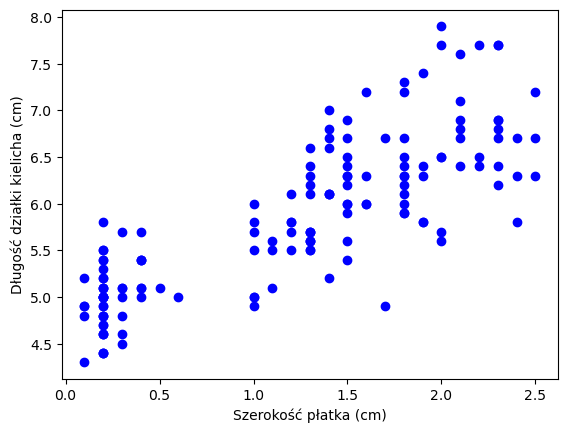

In [3]:
# Wizualizacja zależności
plt.scatter(df['petal width (cm)'], df['sepal length (cm)'], color='blue')
plt.xlabel('Szerokość płatka (cm)')
plt.ylabel('Długość działki kielicha (cm)')
plt.show()

In [4]:
# Przygotowanie danych
X = df[['petal width (cm)']].values
y = df[['sepal length (cm)']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definicja modelu
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Konwersja danych na tensory
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [5]:
# Trening modelu
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Testowanie modelu
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)

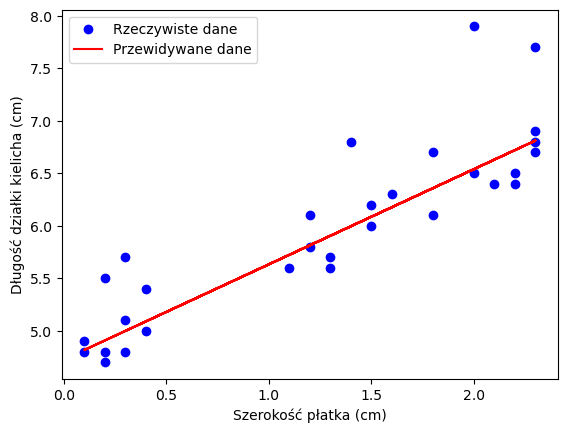

Test loss: 0.16719859838485718


In [6]:
# Wizualizacja wyników
plt.scatter(X_test, y_test, color='blue', label='Rzeczywiste dane')
plt.plot(X_test, predictions.numpy(), color='red', label='Przewidywane dane')
plt.xlabel('Szerokość płatka (cm)')
plt.ylabel('Długość działki kielicha (cm)')
plt.legend()
plt.show()

print(f'Test loss: {test_loss.item()}')